# Cloud Seeding to Increase  Rainfall—A Randomized Experiment 

In [1]:
# standard library imports
import pathlib
import functools

# 3rd party library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import scipy.stats
import seaborn as sns

pd.options.display.width = 128
sns.set()

We begin by reading the data and summarizing the variables.

In [2]:
df = pd.read_csv('case0301.csv')
summary = df.groupby('Treatment').describe()                                    
summary

Rainfall                                                             
             count        mean         std  min     25%    50%      75%     max
Treatment                                                                      
Seeded        26.0  441.984615  650.787171  4.1  98.125  221.6  406.025  2745.6
Unseeded      26.0  164.588462  278.426404  1.0  24.825   44.2  159.200  1202.6

/usr/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

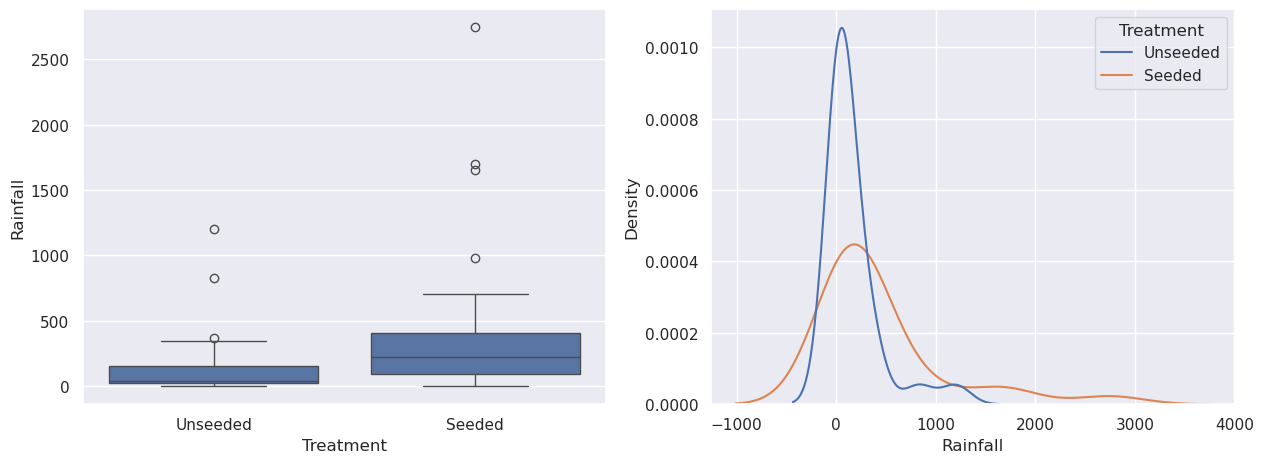

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=[12.8, 4.8])
_ = sns.boxplot(data=df, x='Treatment', y='Rainfall', ax=axes[0]) 
_ = sns.kdeplot(data=df, x='Rainfall', hue='Treatment', ax=axes[1])
fig.tight_layout()

The data is heavily skewed right, suggesting a need to apply a logarithmic transformation.

/usr/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

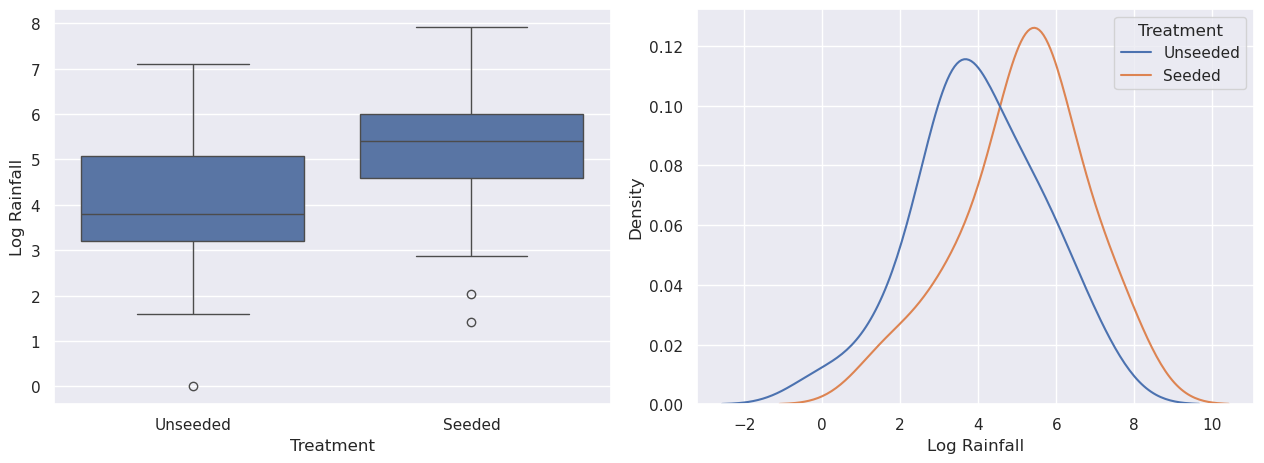

In [4]:
df['Log Rainfall'] = np.log(df['Rainfall'])                                                                                                     
fig, axes = plt.subplots(ncols=2, figsize=[12.8, 4.8])
_ = sns.boxplot(data=df, x='Treatment', y='Log Rainfall', ax=axes[0]) 
_ = sns.kdeplot(data=df, x='Log Rainfall', hue='Treatment', ax=axes[1])
fig.tight_layout()

$$
\begin{align*}
& H_0: \mu_{seeded} = \mu_{unseeded} \\
& H_a: \mu_{seeded} \ne \mu_{unseeded} \\
\end{align*}
$$

In [5]:
x = df.loc[df.Treatment == 'Seeded', 'Log Rainfall']                            
y = df.loc[df.Treatment == 'Unseeded', 'Log Rainfall']                          
stats = pg.ttest(x, y) 
print(stats)

               T  dof alternative     p-val         CI95%   cohen-d   BF10     power
T-test  2.544369   50   two-sided  0.014083  [0.24, 2.05]  0.705681  3.685  0.703777


In [6]:
multiplier = np.exp(x.mean() - y.mean())
print(multiplier)
print(np.exp(stats.loc['T-test', 'CI95%']))

3.1386135237610993
[1.27124915 7.76790111]


There is strong evidence that seeded rainfall amounts were 3.1 time higher than unseeded rainfall amounts ($t_{0.95, 50}$ = 2.544, $p$-value = 0.0141).  We are 95% confident that the multiplicative effect is between 1.3 and 7.8.